# Introduction to [spaCy](https://spacy.io/)

**--[Manoj Prabhakar Kannan Ravi](https://www.linkedin.com/in/manojprabhakar-kr/), Doctoral Candidate @ HPI**



### How to install spaCy

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


### Load the NLP pipeline:

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

## Processing Pipeline

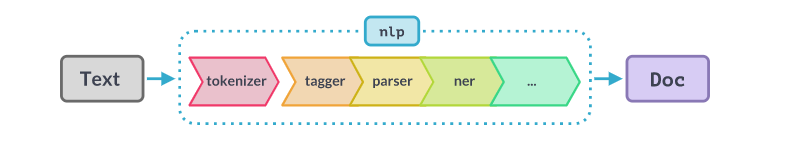

Source : https://spacy.io/usage/processing-pipelines

In [ ]:
text = "Apple is looking at buying U.K. startup for $1 billion!"

In [ ]:
doc = nlp(text)

In [ ]:
nlp.pipe_names

['tagger', 'parser', 'ner']

### Tokenization

In [ ]:
print("-- Using split(' ')")
print(text.split(' '))

-- Using split(' ')
['Apple', 'is', 'looking', 'at', 'buying', 'U.K.', 'startup', 'for', '$1', 'billion!']


In [ ]:
tokens = []
for token in doc:
    tokens.append(token)

print(tokens)

[Apple, is, looking, at, buying, U.K., startup, for, $, 1, billion, !]


### Part-of-speech (POS) 

In [ ]:
for token in doc:
    print("\t".join( (token.text, "-->", token.lemma_, token.pos_, token.tag_,
          token.shape_, str(token.is_alpha), str(token.is_stop))))

Apple	-->	Apple	PROPN	NNP	Xxxxx	True	False
is	-->	be	AUX	VBZ	xx	True	True
looking	-->	look	VERB	VBG	xxxx	True	False
at	-->	at	ADP	IN	xx	True	True
buying	-->	buy	VERB	VBG	xxxx	True	False
U.K.	-->	U.K.	PROPN	NNP	X.X.	False	False
startup	-->	startup	NOUN	NN	xxxx	True	False
for	-->	for	ADP	IN	xxx	True	True
$	-->	$	SYM	$	$	False	False
1	-->	1	NUM	CD	d	False	False
billion	-->	billion	NUM	CD	xxxx	True	False
!	-->	!	PUNCT	.	!	False	False


In [ ]:
spacy.explain("NNP")

'noun, proper singular'

### Dependency Parsing

In [ ]:
for token in doc:
    print(token.text, "-->", token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

Apple --> nsubj looking VERB []
is --> aux looking VERB []
looking --> ROOT looking VERB [Apple, is, at, !]
at --> prep looking VERB [buying]
buying --> pcomp at ADP [startup, for]
U.K. --> compound startup NOUN []
startup --> dobj buying VERB [U.K.]
for --> prep buying VERB [billion]
$ --> quantmod billion NUM []
1 --> compound billion NUM []
billion --> pobj for ADP [$, 1]
! --> punct looking VERB []


In [ ]:
spacy.explain("nsubj")

'nominal subject'

### Named Entity Recognition (NER)

In [ ]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In [ ]:
spacy.explain("GPE")

'Countries, cities, states'

## Using the Visualizer

In [ ]:
from spacy import displacy

The Dependency Parse tree can be visualized by serve and can be seen using the URL [http://localhost:5000/](http://localhost:5000/).

In [ ]:
#displacy.serve(doc, style='dep')

We can use render to display the visualization within the same Jupyter Notebook:

In [ ]:
displacy.render(doc, style='dep', jupyter=True, options={"distance": 150})

We can also visualize the named entity annotations.

In [ ]:
displacy.render(doc, style='ent', jupyter=True)

## spaCy Matcher

Source : [blog](https://www.analyticsvidhya.com/blog/2020/03/spacy-tutorial-learn-natural-language-processing/)

In [ ]:
# Import spaCy Matcher
from spacy.matcher import Matcher

# Initialize the matcher with the spaCy vocabulary
matcher = Matcher(nlp.vocab)

doc = nlp("Some people start their day with lemon water.")

# Define rule
pattern = [{'TEXT': 'lemon'}, {'TEXT': 'water'}]

# Add rule
matcher.add('rule_1', [pattern])

matches = matcher(doc)
matches

[(7604275899133490726, 6, 8)]

In [ ]:
# Extract matched text
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

lemon water


In [ ]:
doc1 = nlp("Did you read this book?")
doc2 = nlp("I will book my tickets")

pattern = [{'TEXT': 'book', 'POS': 'NOUN'}]

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)
matcher.add('rule_2', [pattern])

In [ ]:
matches = matcher(doc1)
matches

[(375134486054924901, 4, 5)]

In [ ]:
matches = matcher(doc2)
matches

[]

## Semantic similarity using word vectors

Refer to [spaCy vectors page](https://spacy.io/usage/vectors-similarity) to use other models or custom word vectors.


In [ ]:
#!python -m spacy download en_core_web_md

-- Example modified from [link](https://spacy.pythonhumanities.com/01_03_word_vectors.html)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#nlp = spacy.load("en_core_web_md")  
doc1 = nlp("I like salty fries and hamburgers.")
doc2 = nlp("Fast food tastes very good.")
doc3 = nlp("Fast shipments are very good.")

# Similarity of these documents
print(doc1, "<->", doc2, doc1.similarity(doc2))
print(doc1, "<->", doc3, doc1.similarity(doc3))
print(doc2, "<->", doc3, doc2.similarity(doc3))

I like salty fries and hamburgers. <-> Fast food tastes very good. 0.3679284418194866
I like salty fries and hamburgers. <-> Fast shipments are very good. 0.24717503829951157
Fast food tastes very good. <-> Fast shipments are very good. 0.7334099402646285


In [ ]:
tokens = nlp(u'dog cat banana wheel')

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 19.378368 True
cat True 19.319294 True
banana True 17.693539 True
wheel True 19.233456 True


In [ ]:
n = 2
print(tokens[n].text, len(tokens[n].vector), tokens[n].vector)

banana 96 [ 1.5871911   0.8064396  -0.9054165  -0.8100374   0.95870805  1.0146952
 -1.1023825   1.8020909   2.5353732   2.7387426  -0.43189812 -0.12808043
  0.75751686 -0.9152087  -0.15977871 -0.9103936  -2.1560912   1.32443
 -0.1405558  -0.6373711   4.32754    -0.88028044  0.03564376 -2.9327438
 -1.0217257   0.731537    2.4963975   1.0742254   1.4460571  -2.6484275
  0.5366294  -1.4870604  -0.83379704 -0.4151709  -1.9360238  -1.7089003
  3.7156317   0.58594716  0.29604545 -0.7416147   4.061759    2.0177944
  0.8102745  -4.117684    0.5899048   0.5998761  -3.1075888  -0.70453393
 -0.10131472  1.0950371  -1.2231823  -2.9008093   0.37960178  0.2982519
 -2.3102129   0.20481265  1.7023772   2.2459512  -1.5036099   2.4872742
  0.46261945 -1.469563   -1.963779    4.2778063  -0.8498221   0.89605945
  0.6714468  -2.0104113   0.18463123  2.7223854  -2.8811326   0.90999866
 -1.9458306   2.824358   -1.5410196   0.2469359   1.3095249  -1.3957369
 -0.6296301  -0.50245476  0.8588661  -1.7943428  -4.

Source : [Github repository](https://github.com/dcavar/python-tutorial-notebooks)

Another similarity example for some popular words.

In [ ]:
tokens = nlp(u'queen king chef')

for token1 in tokens:
    for token2 in tokens:
        print(token1, token2, token1.similarity(token2))

queen queen 1.0
queen king 0.57581687
queen chef 0.3309688
king queen 0.57581687
king king 1.0
king chef 0.44007176
chef queen 0.3309688
chef king 0.44007176
chef chef 1.0


### Similarities in Context

In [ ]:
tokens = nlp(u'labrador')

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

labrador True 19.982306 True


In [ ]:
doc1 = nlp(u"The labrador barked.")
doc2 = nlp(u"The labrador swam.")
doc3 = nlp(u"The people on Labrador are Canadians.")

dog = nlp(u"dog")

count = 0
for doc in [doc1, doc2, doc3]:
    lab = doc
    count += 1
    print(str(count) + ":", lab.similarity(dog))

1: 0.17863217662087344
2: 0.2774142819743359
3: 0.1853336600408966


In [ ]:
docs = [nlp(u"dog bites man"), nlp(u"man bites dog"),
        nlp(u"man dog bites"), nlp(u"cat eats mouse")]

for doc in docs:
    for other_doc in docs:
        print('"' + doc.text + '"', '"' + other_doc.text + '"', doc.similarity(other_doc))

"dog bites man" "dog bites man" 1.0
"dog bites man" "man bites dog" 0.9454270050051115
"dog bites man" "man dog bites" 0.8925287164710086
"dog bites man" "cat eats mouse" 0.6138338938504083
"man bites dog" "dog bites man" 0.9454270050051115
"man bites dog" "man bites dog" 1.0
"man bites dog" "man dog bites" 0.8896486160263385
"man bites dog" "cat eats mouse" 0.673638000133504
"man dog bites" "dog bites man" 0.8925287164710086
"man dog bites" "man bites dog" 0.8896486160263385
"man dog bites" "man dog bites" 1.0
"man dog bites" "cat eats mouse" 0.551124818246088
"cat eats mouse" "dog bites man" 0.6138338938504083
"cat eats mouse" "man bites dog" 0.673638000133504
"cat eats mouse" "man dog bites" 0.551124818246088
"cat eats mouse" "cat eats mouse" 1.0


## Training

-- Modified from [blog](https://www.machinelearningplus.com/nlp/training-custom-ner-model-in-spacy/)

An example code for training an NER model.

In [ ]:
#nlp = spacy.load('en_core_web_md')

In [ ]:
from spacy.util import minibatch, compounding
from pathlib import Path
import random

In [ ]:
# Load pre-existing spacy model
nlp=spacy.load('en_core_web_sm')

# Getting the pipeline component
ner=nlp.get_pipe("ner")

The training data format!

In [ ]:
# training data
TRAIN_DATA = [
              ("Walmart is a leading e-commerce company", {"entities": [(0, 7, "ORG")]}),
              ("I reached Chennai yesterday.", {"entities": [(19, 28, "GPE")]}),
              ("I recently ordered a book from Amazon", {"entities": [(24,32, "ORG")]}),
              ("I was driving a BMW", {"entities": [(16,19, "PRODUCT")]}),
              ("I ordered this from ShopClues", {"entities": [(20,29, "ORG")]}),
              ("Fridge can be ordered in Amazon ", {"entities": [(0,6, "PRODUCT")]}),
              ("I bought a new Washer", {"entities": [(16,22, "PRODUCT")]}),
              ("I bought a old table", {"entities": [(16,21, "PRODUCT")]}),
              ("I bought a fancy dress", {"entities": [(18,23, "PRODUCT")]}),
              ("I rented a camera", {"entities": [(12,18, "PRODUCT")]}),
              ("I rented a tent for our trip", {"entities": [(12,16, "PRODUCT")]}),
              ("I rented a screwdriver from our neighbour", {"entities": [(12,22, "PRODUCT")]}),
              ("I repaired my computer", {"entities": [(15,23, "PRODUCT")]}),
              ("I got my clock fixed", {"entities": [(16,21, "PRODUCT")]}),
              ("I got my truck fixed", {"entities": [(16,21, "PRODUCT")]}),
              ("Flipkart started it's journey from zero", {"entities": [(0,8, "ORG")]}),
              ("I recently ordered from Max", {"entities": [(24,27, "ORG")]}),
              ("Flipkart is recognized as leader in market",{"entities": [(0,8, "ORG")]}),
              ("I recently ordered from Swiggy", {"entities": [(24,30, "ORG")]})
              ]

In [ ]:
# Adding labels to the `ner`
for _, annotations in TRAIN_DATA:
  for ent in annotations.get("entities"):
    ner.add_label(ent[2])

In [ ]:
# Disable pipeline components you dont need to change
pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

In [ ]:
with nlp.disable_pipes(*other_pipes):  # only train NER
    for itn in range(30):
        random.shuffle(TRAIN_DATA)
        losses = {}
        # batch up the examples using spaCy's minibatch
        batches = minibatch(TRAIN_DATA, size=compounding(4.0, 32.0, 1.001))
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(
                texts,  # batch of texts
                annotations,  # batch of annotations
                drop=0.5,  # dropout - make it harder to memorise data
                losses=losses,
            )
        print("Losses", losses)

Losses {'ner': 22.663299785570416}
Losses {'ner': 14.440529714026898}
Losses {'ner': 9.59392978363121}
Losses {'ner': 11.639361066964739}
Losses {'ner': 9.861955335195717}
Losses {'ner': 14.151953438622172}
Losses {'ner': 9.477473568335427}
Losses {'ner': 4.9097686585745866}
Losses {'ner': 7.46763817722092}
Losses {'ner': 5.5857929075102675}
Losses {'ner': 12.023708899357182}
Losses {'ner': 5.246545431490119}
Losses {'ner': 7.607580455684229}
Losses {'ner': 5.9596031884685665}
Losses {'ner': 4.6183865842090785}
Losses {'ner': 5.320895846318014}
Losses {'ner': 6.269039736386078}
Losses {'ner': 6.555036921551676}
Losses {'ner': 3.8680488195167264}
Losses {'ner': 3.049194141960027}
Losses {'ner': 0.8021311926923247}
Losses {'ner': 4.838221342640789}
Losses {'ner': 0.8188255526324171}
Losses {'ner': 2.6246900092201635}
Losses {'ner': 0.19894797566828917}
Losses {'ner': 3.477537053434245}
Losses {'ner': 0.23884249474980895}
Losses {'ner': 3.7102385171306205}
Losses {'ner': 0.372989859701076

In [ ]:
output_dir = Path("./models/")

In [ ]:
if not output_dir.exists():
    output_dir.mkdir()
nlp.to_disk(output_dir)

In [ ]:
nlp2 = spacy.load(output_dir)

In [ ]:
# Testing the model
doc = nlp2("I was driving a Alto")
print("Entities", [(ent.text, ent.label_) for ent in doc.ents])

Entities [('Alto', 'PRODUCT')]


In [ ]:
test_data = "Apple is looking at buying U.K. startup for $1 billion!"
doc = nlp2(test_data)
print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
print("Tokens", [(t.text, t.ent_type_, t.ent_iob_) for t in doc])

Entities [('Apple', 'ORG'), ('U.K.', 'ORG'), ('$1 billion', 'MONEY')]
Tokens [('Apple', 'ORG', 'B'), ('is', '', 'O'), ('looking', '', 'O'), ('at', '', 'O'), ('buying', '', 'O'), ('U.K.', 'ORG', 'B'), ('startup', '', 'O'), ('for', '', 'O'), ('$', 'MONEY', 'B'), ('1', 'MONEY', 'I'), ('billion', 'MONEY', 'I'), ('!', '', 'O')]


## spaCyTextBlob

In [ ]:
!pip install spacytextblob

In [ ]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [ ]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 1.6 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Source : [link](https://spacy.io/universe/project/spacy-textblob)

In [ ]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
text = 'I had a really horrible day. It was the worst day ever! But every now and then I have a really good day that makes me happy.'
doc = nlp(text)
print('Polarity:', doc._.polarity) 
print('Subjectivity:', doc._.subjectivity) 

Polarity: -0.125
Subjectivity: 0.9


In [ ]:
transcript_text_b = ["OK, it's – it’s a problem we have to work on. ",
                     "[Mumbled sound of assent]. Can you read it?",
                     "The product in front of you.",                   
                     "Right."
                     "It seems like it.",
                     "And maybe you could – Maybe there’s like a little optical thingy here, and you sort of run it along an edge?",
                     "Or the whole thing is a scanner thing."]

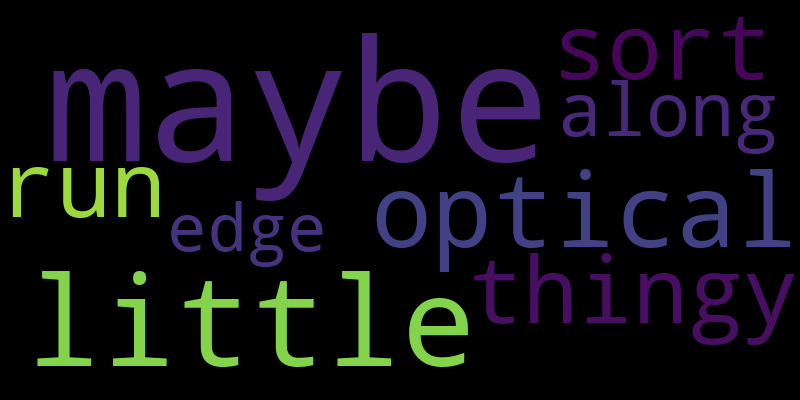

In [ ]:
import wordcloud
import re
from wordcloud import WordCloud
wc = WordCloud(width=800,height=400).generate(re.sub(r"\s+"," ", transcript_text_b[4]))
wc.to_image()

In [ ]:
doc_transcript_b = list(nlp.pipe(transcript_text_b))
doc_transcript_b

[OK, it's – it’s a problem we have to work on. ,
 [Mumbled sound of assent]. Can you read it?,
 The product in front of you.,
 Right.It seems like it.,
 And maybe you could – Maybe there’s like a little optical thingy here, and you sort of run it along an edge?,
 Or the whole thing is a scanner thing.]

In [ ]:
for doc in doc_transcript_b:
  print('=' * 64)
  print(doc.text)
  print('Polarity:', doc._.polarity)
  print('Sujectivity:', doc._.subjectivity)
  print('Assessments:', doc._.assessments)

OK, it's – it’s a problem we have to work on. 
Polarity: 0.5
Sujectivity: 0.5
Assessments: [(['ok'], 0.5, 0.5, None)]
[Mumbled sound of assent]. Can you read it?
Polarity: 0.4
Sujectivity: 0.4
Assessments: [(['sound'], 0.4, 0.4, None)]
The product in front of you.
Polarity: 0.0
Sujectivity: 0.0
Assessments: []
Right.It seems like it.
Polarity: 0.0
Sujectivity: 0.0
Assessments: []
And maybe you could – Maybe there’s like a little optical thingy here, and you sort of run it along an edge?
Polarity: -0.1875
Sujectivity: 0.5
Assessments: [(['little'], -0.1875, 0.5, None)]
Or the whole thing is a scanner thing.
Polarity: 0.2
Sujectivity: 0.4
Assessments: [(['whole'], 0.2, 0.4, None)]


## References 

* https://spacy.io/
* [GitHub repo](https://github.com/dcavar/python-tutorial-for-ipython).
*   https://spacy.pythonhumanities.com/intro.html
*   https://www.analyticsvidhya.com/blog/2020/03/spacy-tutorial-learn-natural-language-processing/
*   https://www.machinelearningplus.com/nlp/training-custom-ner-model-in-spacy/
*   https://spacy.io/universe/project/spacy-textblob



